Сравните производительность на MNIST:
- Полносвязная сеть (3-4 слоя)
- Простая CNN (2-3 conv слоя)
- CNN с Residual Block

Для каждого варианта:
- Обучите модель с одинаковыми гиперпараметрами
- Сравните точность на train и test множествах
- Измерьте время обучения и инференса
- Визуализируйте кривые обучения
- Проанализируйте количество параметров


In [2]:
import torch
from datasets import get_mnist_loaders, get_cifar_loaders
from modelsCNN import SimpleCNN, CNNWithResidual, CIFARCNN
from modelsFC import FullyConnectedModel
from trainer import train_model
from utils import plot_training_history, count_parameters, compare_models, plot_confusion_matrix
import time
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [4]:
train_loader, test_loader = get_mnist_loaders(batch_size=64)

In [5]:
simple_cnn_mnist = SimpleCNN(input_channels=1, num_classes=10).to(device)
residual_cnn_mnist = CNNWithResidual(input_channels=1, num_classes=10).to(device)
fc_model_mnist  = FullyConnectedModel(
    input_size=28*28,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 512},
        {"type": "relu"},
        {"type": "linear", "size": 256},
        {"type": "relu"},
        {"type": "linear", "size": 128},
        {"type": "relu"},
        {"type": "linear", "size": 10}
    ]
).to(device)

In [6]:
params = {}
params["Simple fc parameters:"] = count_parameters(fc_model_mnist)
params["CNN parameters:"] =  count_parameters(simple_cnn_mnist)
params["Residual CNN parameters:"] =  count_parameters(residual_cnn_mnist)

In [7]:
times = {}

In [8]:
print("Training FC model...")
start_train = time.time()
fc_history = train_model(fc_model_mnist, train_loader, test_loader, epochs=5, device=str(device))
end_train = time.time()
times["FC model time:"] = end_train - start_train

Training FC model...


100%|██████████| 157/157 [00:01<00:00, 86.69it/s]


Epoch 1/5:
Train Loss: 0.2514, Train Acc: 0.9228
Test Loss: 0.1486, Test Acc: 0.9521
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 90.51it/s]


Epoch 2/5:
Train Loss: 0.0980, Train Acc: 0.9698
Test Loss: 0.1092, Test Acc: 0.9675
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 89.88it/s]


Epoch 3/5:
Train Loss: 0.0686, Train Acc: 0.9787
Test Loss: 0.0746, Test Acc: 0.9769
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 87.99it/s]


Epoch 4/5:
Train Loss: 0.0513, Train Acc: 0.9842
Test Loss: 0.0758, Test Acc: 0.9789
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 89.81it/s]

Epoch 5/5:
Train Loss: 0.0443, Train Acc: 0.9863
Test Loss: 0.0717, Test Acc: 0.9788
--------------------------------------------------


In [9]:
print("Training CNN model...")
start_train = time.time()
cnn_history = train_model(simple_cnn_mnist, train_loader, test_loader, epochs=5, device=str(device))
end_train = time.time()
times["CNN time:"] = end_train - start_train

Training CNN model...


100%|██████████| 157/157 [00:01<00:00, 88.85it/s]


Epoch 1/5:
Train Loss: 0.1614, Train Acc: 0.9500
Test Loss: 0.0399, Test Acc: 0.9865
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 86.58it/s]


Epoch 2/5:
Train Loss: 0.0531, Train Acc: 0.9835
Test Loss: 0.0349, Test Acc: 0.9869
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 85.77it/s]


Epoch 3/5:
Train Loss: 0.0385, Train Acc: 0.9879
Test Loss: 0.0276, Test Acc: 0.9905
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 80.67it/s]


Epoch 4/5:
Train Loss: 0.0315, Train Acc: 0.9899
Test Loss: 0.0288, Test Acc: 0.9907
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 88.33it/s]

Epoch 5/5:
Train Loss: 0.0237, Train Acc: 0.9926
Test Loss: 0.0277, Test Acc: 0.9915
--------------------------------------------------


In [10]:
print("Training Residual CNN...")
start_train = time.time()
residual_history = train_model(residual_cnn_mnist, train_loader, test_loader, epochs=5, device=str(device))
end_train = time.time()
times["Residual CNN time:"] = end_train - start_train

Training Residual CNN...


100%|██████████| 157/157 [00:02<00:00, 72.13it/s]


Epoch 1/5:
Train Loss: 0.1007, Train Acc: 0.9714
Test Loss: 0.0446, Test Acc: 0.9858
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 71.12it/s]


Epoch 2/5:
Train Loss: 0.0397, Train Acc: 0.9874
Test Loss: 0.0495, Test Acc: 0.9841
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 69.55it/s]


Epoch 3/5:
Train Loss: 0.0307, Train Acc: 0.9906
Test Loss: 0.0261, Test Acc: 0.9917
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 72.76it/s]


Epoch 4/5:
Train Loss: 0.0257, Train Acc: 0.9917
Test Loss: 0.0246, Test Acc: 0.9906
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 71.60it/s]

Epoch 5/5:
Train Loss: 0.0224, Train Acc: 0.9928
Test Loss: 0.0212, Test Acc: 0.9939
--------------------------------------------------


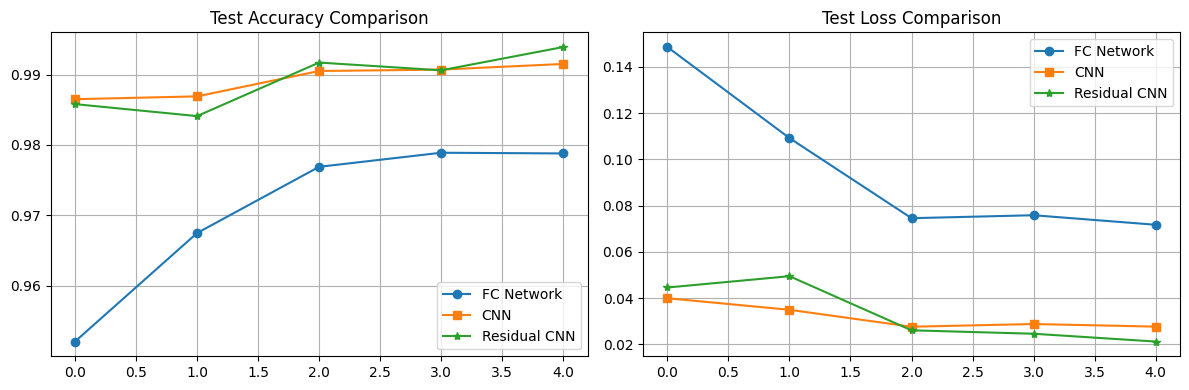

FC model time: 72.67089867591858
CNN time: 77.36154055595398
Residual CNN time: 111.08396100997925
Simple fc parameters: 567544
CNN parameters: 421642
Residual CNN parameters: 160906


In [11]:
compare_models(fc_history, cnn_history, residual_history) 
for str_name in times: print(f"{str_name} {times[str_name]}")
for str_name in params: print(f"{str_name} {params[str_name]}")

Сравните производительность на CIFAR-10:
- Полносвязная сеть (глубокая)
- CNN с Residual блоками
- CNN с регуляризацией и Residual блоками

Для каждого варианта:
- Обучите модель с одинаковыми гиперпараметрами
- Сравните точность и время обучения
- Проанализируйте переобучение
- Визуализируйте confusion matrix
- Исследуйте градиенты (gradient flow)

In [12]:
train_loader, test_loader = get_cifar_loaders(batch_size=64)

In [13]:
simple_cnn_cifar = CIFARCNN().to(device)
residual_cnn_cifar = CNNWithResidual(input_channels=3, num_classes=10).to(device)
fc_model_cifar  = FullyConnectedModel(
    input_size=32*32*3,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 512},
        {"type": "relu"},
        {"type": "linear", "size": 256},
        {"type": "relu"},
        {"type": "linear", "size": 128},
        {"type": "relu"},
        {"type": "linear", "size": 10}
    ]
).to(device)

In [14]:
params = {}
params["Simple fc parameters:"] = count_parameters(fc_model_cifar)
params["CNN parameters:"] =  count_parameters(residual_cnn_cifar)
params["Residual CNN parameters:"] =  count_parameters(simple_cnn_cifar)

In [15]:
times = {}

In [16]:
print("Training FC model...")
start_train = time.time()
fc_history = train_model(fc_model_cifar, train_loader, test_loader, epochs=5, device=str(device))
end_train = time.time()
times["FC model time:"] = end_train - start_train

Training FC model...


100%|██████████| 157/157 [00:02<00:00, 73.28it/s]


Epoch 1/5:
Train Loss: 1.6761, Train Acc: 0.4032
Test Loss: 1.5367, Test Acc: 0.4589
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.97it/s]


Epoch 2/5:
Train Loss: 1.4564, Train Acc: 0.4856
Test Loss: 1.4686, Test Acc: 0.4868
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 73.25it/s]


Epoch 3/5:
Train Loss: 1.3444, Train Acc: 0.5273
Test Loss: 1.3874, Test Acc: 0.5081
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 73.17it/s]


Epoch 4/5:
Train Loss: 1.2519, Train Acc: 0.5586
Test Loss: 1.4173, Test Acc: 0.5028
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.30it/s]

Epoch 5/5:
Train Loss: 1.1742, Train Acc: 0.5827
Test Loss: 1.3683, Test Acc: 0.5188
--------------------------------------------------


In [17]:
print("Training CNN model...")
start_train = time.time()
cnn_history = train_model(simple_cnn_cifar, train_loader, test_loader, epochs=5, device=str(device))
end_train = time.time()
times["CNN time:"] = end_train - start_train

Training CNN model...


100%|██████████| 157/157 [00:02<00:00, 69.08it/s]


Epoch 1/5:
Train Loss: 1.3631, Train Acc: 0.5071
Test Loss: 1.0636, Test Acc: 0.6251
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 71.39it/s]


Epoch 2/5:
Train Loss: 0.9275, Train Acc: 0.6734
Test Loss: 0.8695, Test Acc: 0.6945
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 71.84it/s]


Epoch 3/5:
Train Loss: 0.7607, Train Acc: 0.7353
Test Loss: 0.8293, Test Acc: 0.7096
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.81it/s]


Epoch 4/5:
Train Loss: 0.6522, Train Acc: 0.7694
Test Loss: 0.7166, Test Acc: 0.7540
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 69.70it/s]

Epoch 5/5:
Train Loss: 0.5635, Train Acc: 0.8018
Test Loss: 0.7310, Test Acc: 0.7478
--------------------------------------------------


In [18]:
print("Training Residual CNN...")
start_train = time.time()
residual_history = train_model(residual_cnn_cifar, train_loader, test_loader, epochs=5, device=str(device))
end_train = time.time()
times["Residual CNN time:"] = end_train - start_train

Training Residual CNN...


100%|██████████| 157/157 [00:02<00:00, 60.61it/s]


Epoch 1/5:
Train Loss: 1.1827, Train Acc: 0.5774
Test Loss: 0.9756, Test Acc: 0.6617
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 61.18it/s]


Epoch 2/5:
Train Loss: 0.7920, Train Acc: 0.7220
Test Loss: 0.7328, Test Acc: 0.7483
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 61.37it/s]


Epoch 3/5:
Train Loss: 0.6627, Train Acc: 0.7694
Test Loss: 0.7805, Test Acc: 0.7303
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 58.26it/s]


Epoch 4/5:
Train Loss: 0.5758, Train Acc: 0.7994
Test Loss: 0.6371, Test Acc: 0.7819
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 61.28it/s]

Epoch 5/5:
Train Loss: 0.5062, Train Acc: 0.8237
Test Loss: 0.6492, Test Acc: 0.7820
--------------------------------------------------


In [ ]:

def plot_gradient_flow(named_parameters):
    avg_grads = []
    max_grads = []
    layers = []
    
    for name, param in named_parameters:
        if param.requires_grad and param.grad is not None:
            layers.append(name)
            avg_grads.append(param.grad.abs().mean().item())
            max_grads.append(param.grad.abs().max().item())
    
    plt.figure(figsize=(10, 5))
    plt.plot(avg_grads, label='mean gradient')
    plt.plot(max_grads, label='max gradient')
    plt.hlines(0, 0, len(avg_grads)-1, linestyle='dashed', color='black')
    plt.xticks(ticks=range(len(layers)), labels=layers, rotation=90)
    plt.xlabel("Layers")
    plt.ylabel("Gradient")
    plt.title("Gradient flow")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

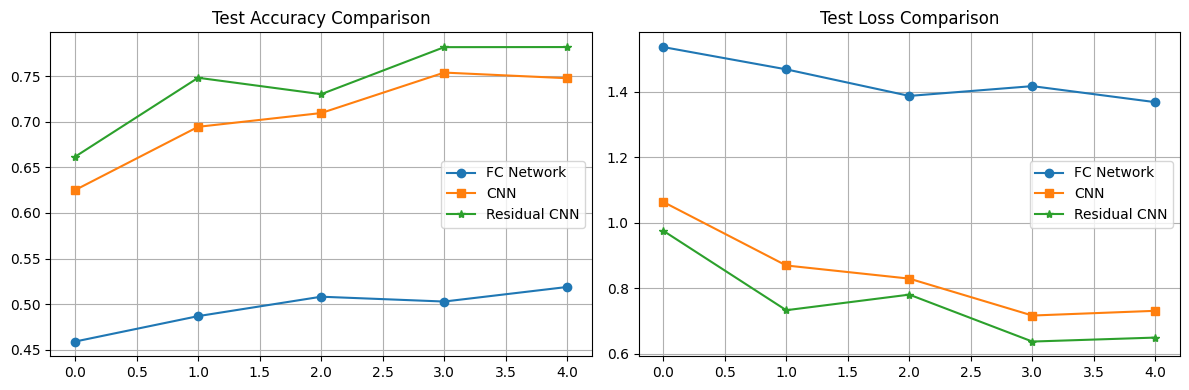

FC model time: 75.0312922000885
CNN time: 81.11643624305725
Residual CNN time: 117.76041769981384
Simple fc parameters: 1739000
CNN parameters: 161482
Residual CNN parameters: 620362


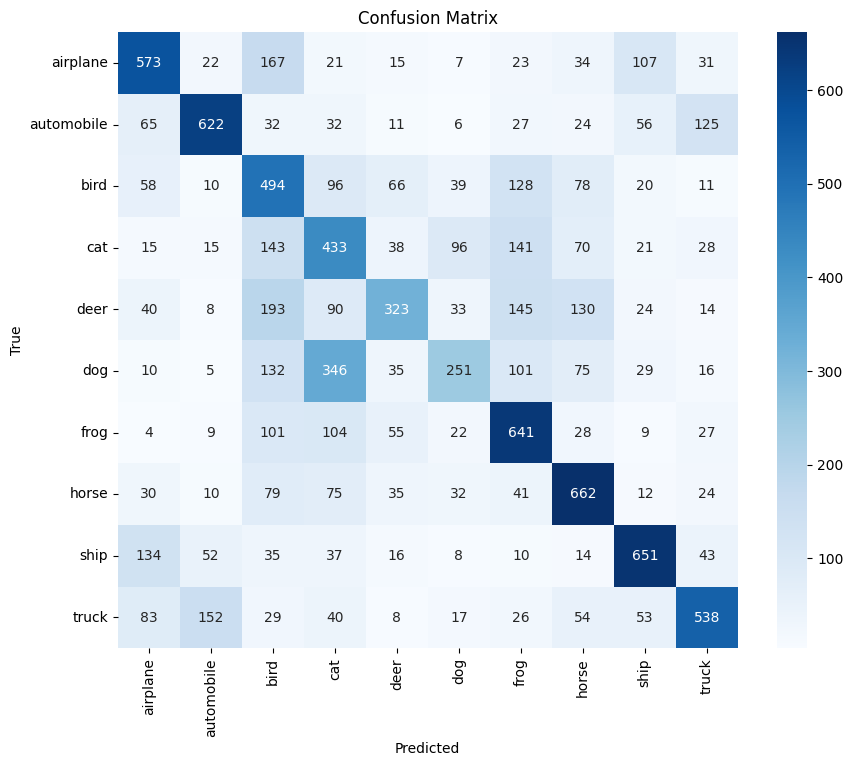

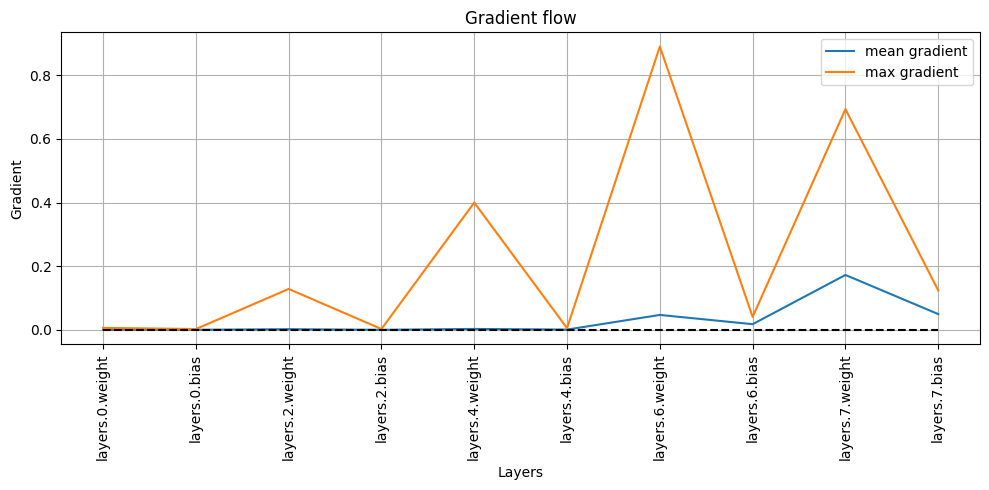

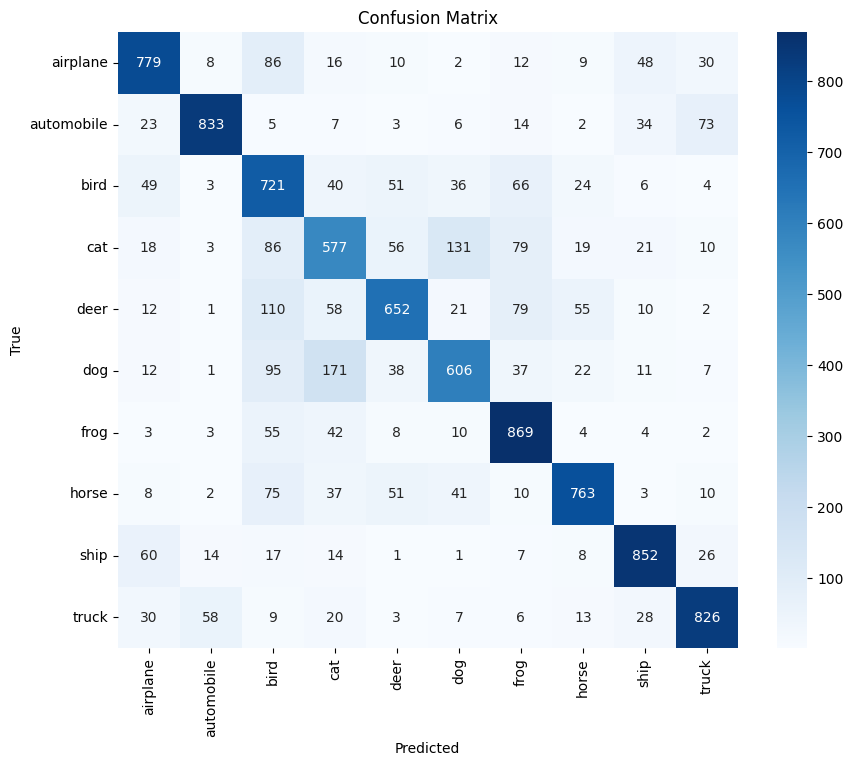

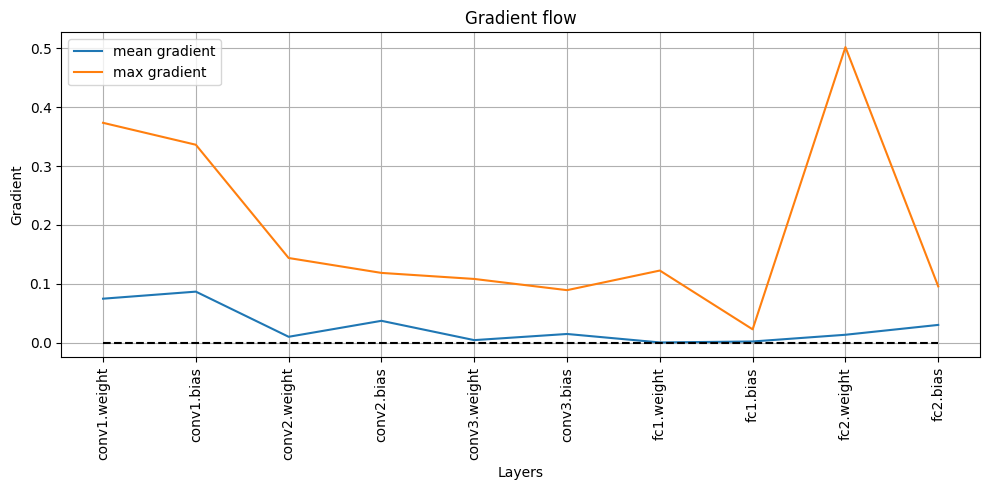

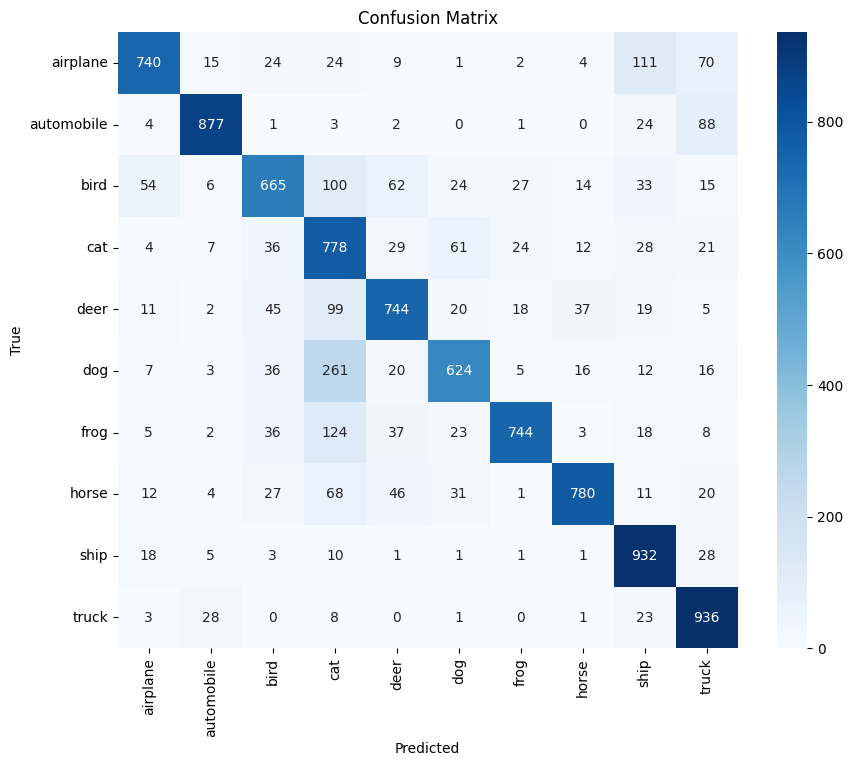

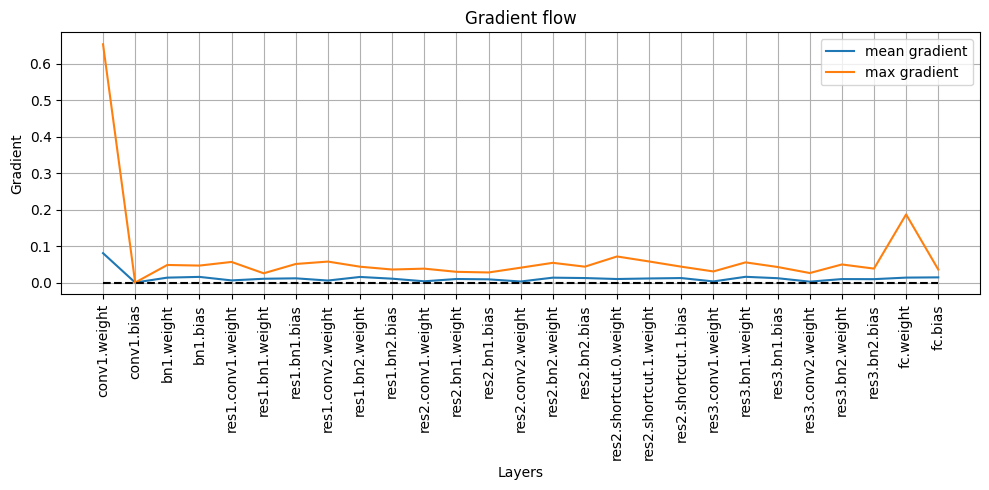

In [26]:
compare_models(fc_history, cnn_history, residual_history) 
for str_name in times: print(f"{str_name} {times[str_name]}")
for str_name in params: print(f"{str_name} {params[str_name]}")
classes = test_loader.dataset.dataset.classes
plot_confusion_matrix(fc_model_cifar, test_loader, classes, device = device)
plot_gradient_flow(fc_model_cifar.named_parameters())
plot_confusion_matrix(simple_cnn_cifar, test_loader, classes, device = device)
plot_gradient_flow(simple_cnn_cifar.named_parameters())
plot_confusion_matrix(residual_cnn_cifar, test_loader, classes, device = device)
plot_gradient_flow(residual_cnn_cifar.named_parameters())